In [1]:
!git clone --depth 1 https://github.com/MarcusOlivecrona/REINVENT.git

Cloning into 'REINVENT'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 27 (delta 0), reused 20 (delta 0), pack-reused 0
Receiving objects: 100% (27/27), 42.01 MiB | 14.92 MiB/s, done.


In [2]:
!wget https://github.com/Mishima-syk/13/raw/master/generator_handson/data.zip
!unzip data.zip
!rm -rf ./REINVENT/data
!mv data ./REINVENT/

--2021-06-24 06:49:53--  https://github.com/Mishima-syk/13/raw/master/generator_handson/data.zip
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Mishima-syk/13/master/generator_handson/data.zip [following]
--2021-06-24 06:49:53--  https://raw.githubusercontent.com/Mishima-syk/13/master/generator_handson/data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 78454973 (75M) [application/zip]
Saving to: ‘data.zip’

data.zip            100%[===================>]  74.82M  21.4MB/s    in 4.3s    

2021-06-24 06:49:58 (17.5 MB/s) - ‘data.zip’ saved [78454973/78454973]

Archive:  data.zip
   creating:

In [3]:
!git clone --depth 1 https://github.com/Mishima-syk/13.git

Cloning into '13'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 22 (delta 0), reused 21 (delta 0), pack-reused 0
Receiving objects: 100% (22/22), 110.58 MiB | 15.71 MiB/s, done.


In [4]:
!sed -i -e "s/multinomial(prob)/multinomial(prob,1)/g" \
-e "s/softmax(logits)/softmax(logits,dim=1)/g" ./REINVENT/model.py

In [5]:
%matplotlib inline
import sys
sys.path.append("./REINVENT")
from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs, Draw
import torch
from model import RNN
from data_structs import Vocabulary
from utils import seq_to_smiles

In [6]:
voc = Vocabulary(init_from_file="./REINVENT/data/Voc")
Agent = RNN(voc)
Agent.rnn.load_state_dict(torch.load("./13/generator_handson/sitagliptin_agent_3000/Agent.ckpt"))
seqs, agent_likelihood, entropy = Agent.sample(50)
smiles = seq_to_smiles(seqs, voc)

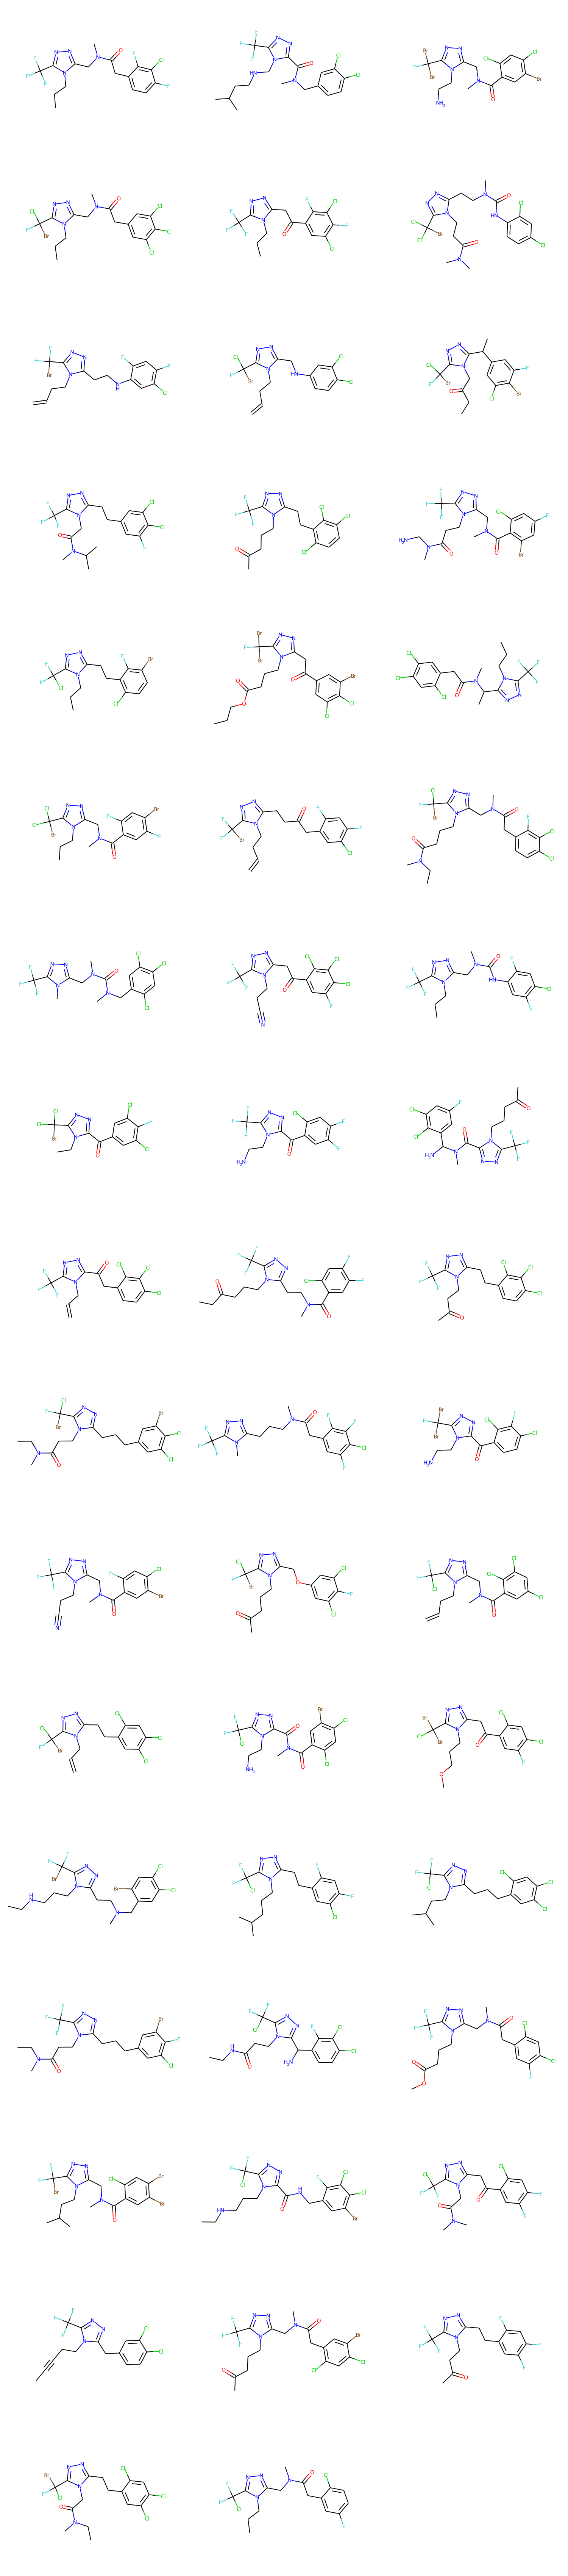

In [7]:
mols = []
for smi in smiles:
    mol = Chem.MolFromSmiles(smi)
    if mol is not None:
        mols.append(mol)

Draw.MolsToGridImage(mols, molsPerRow=3, subImgSize=(500,400))